<a href="https://colab.research.google.com/github/javers12/AdvLinearAlgebra/blob/master/Copy_of_Singular_Value_Decomposition_with_an_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Singular Values Decomposition and Images

In this project, we use the Singular Value Decomposition (SVD) to analyze a matrix which represents a picture and represent the picture using fewer than all of the singular values. 

First, we will import an image of a racoon and save it to our local directory (within Colab).

In [0]:
#  Libraries that we'll need:
import numpy as np
from scipy import misc
from scipy import linalg
from PIL import Image
import imageio
import matplotlib.pyplot as plt

In [0]:
#  Generate a picture to analyze and save it in our directory.
face = misc.face()
imageio.imwrite('face.png', face) #create the image file
#face = imageio.imread('face.jpg') # read in the image file
face.shape, face.dtype

((768, 1024, 3), dtype('uint8'))

In [0]:
#  Read in face image:
origImg = misc.face()
origImg.shape, origImg.dtype
#  The image contains three colors of data.  Color data extends from 0 to 256.
#  The pixel in entry [100, 100] has values of 94/256 for Red, 82/256 for green, and 92/256 for blue:
origImg[100][100]

array([94, 82, 92], dtype=uint8)

#  1.  The code below is used to adjust the number of singular values used within the image.

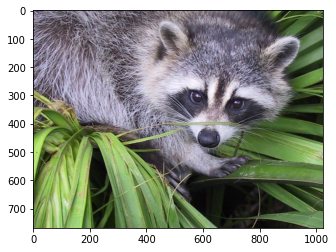

In [0]:
#make a copy of the image
copyImg = origImg.copy()
plt.imshow(copyImg, origin='upper')

In [0]:
#  We'll split the array of colors into three separate matrices:

#  The code below makes a copy of the color data in copyImg[i][j][0] 
#  and puts it into r_image[i][j][0], but leaves the other two colors blank.

#  First, make a matrix to hold the data for the first color.
#(rows, columns, colors) = copyImg.shape

#  Then, copy over the color data:
#r_image = np.random.randn(rows, columns)
#for i in range(rows):
#    for j in range(columns):
#        r_image[i][j] = copyImg[i][j][0]

#  This is a faster way of doing that same code:
r_image = copyImg[:, :, 0]

#  YOU:  creage a g_image and a b_image matrix which contains data for the green and blue pixels.
g_image = copyImg[:, :, 1]
b_image = copyImg[:, :, 2]



In [0]:
# decompose the matrix a, representing the color 0, using SVD:
Ur, sr, Vhr = linalg.svd(r_image)
Ur.shape, sr.shape, Vhr.shape
Mr,Nr = r_image.shape
Sigr = linalg.diagsvd(sr,Mr,Nr)

# YOU:  do the same for the other two colors:
Ug, sg, Vhg = linalg.svd(g_image)
Ug.shape, sg.shape, Vhg.shape
Mg,Ng = g_image.shape
Sigg = linalg.diagsvd(sg,Mg,Ng)

Ub, sb, Vhb = linalg.svd(b_image)
Ub.shape, sb.shape, Vhb.shape
Mb,Nb = b_image.shape
Sigb = linalg.diagsvd(sb,Mb,Nb)



In [0]:
# make a copy of the matrix holding the singular values:
SSigr = Sigr.copy()

# Eliminate some of the singular values in the singular value matrix for color 0:
ZeroAfter = 5
ZeroTo = min(SSigr.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigr[i][i] = 0


# YOU: Modify the code above to do the same thing for the other two colors.
SSigg = Sigg.copy()

ZeroAfter = 5
ZeroTo = min(SSigg.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigg[i][i] = 0

SSigb = Sigb.copy()

ZeroAfter = 250
ZeroTo = min(SSigb.shape) - 1
for i in range(ZeroAfter,ZeroTo):
    SSigb[i][i] = 0





In [0]:
# compute the new matrix using just these singular values for the red color:
new_r_image = Ur.dot(SSigr.dot(Vhr))

# YOU:  Do this for the other two colors:
new_g_image = Ur.dot(SSigg.dot(Vhr))

new_b_image = Ur.dot(SSigb.dot(Vhr))

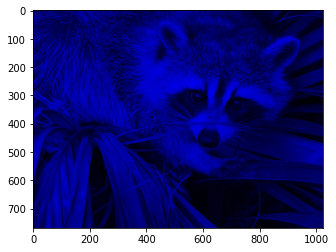

In [0]:
# pack the data from your new matrix back into the image.  
newImg = origImg.copy()
newImg.fill(0)

# We could do this with loops:
#(rows, columns, colors) = newImg.shape
#for i in range(rows):
#    for j in range(columns):
#        newImg[i][j][0] = new_r_image[i][j]

# But this code does it much faster:
#newImg[:,:,0] = new_r_image

# YOU:  Modify the code above to pack the data for the other two colors:
#newImg[:,:,1] = new_g_image
newImg[:,:,2] = new_b_image

plt.imshow(newImg, origin='upper')

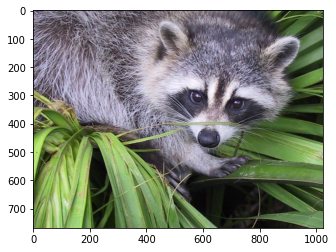

In [0]:
#Original image:
plt.imshow(copyImg, origin='upper')

In [0]:
#  save the image to your directory
filename = 'face_svd_' + str(ZeroAfter) + '.png'
imageio.imwrite(filename, newImg) #create the image file where nnn refers to the singular values you're using for this image.

#2.  Analyze the impact of singular values.

Go back to Section 1, and adjust the code just using the ZeroAfter value.  Do this for several different values of ZeroAfter (e.g. 1, 5, 10, 15, 20, 25, 50, 100, 500, and 768).

Then, analyze the results by answering the following questions:

# Question 0:  
How large is the original picture?  ( size depends on rows, columns, and colors)
The picture is 0-700 regarding rows and 0-1000 for columns. Color is clear and visible.
How large is the SVD decomposition?  (size depends on number of svds, number of eigenvectors used and size of matrices & and Vh, and number of colors)
700 by 1000 is how large the image is but is effected by the number of svds. Number of colors is presented on how clear the picture is which the color becomes more visible.

How do these sizes compare?
These sizes compare due to the fact that the picture is much more clear as the number of svds go up but the size relatively stays the same.

#  Question 1:
What do you expect to see if we use just 1 singular value?
You don't really see the picture much, it's not very visible. 

Did you see what you expected?
I did expect that because when i was going higher for singular values the picture was getting more clear. So i expected that the picture was not going to be as clear.

# Question 2:
What do you expect to see if we use all of the singular value?
The picture would be very clear and very visible.

Did you see what you expected?
Yes because the more singular values you add to the picture, the better and more clear the picture is.


#  Question 3:
Create images using 1, 5, 10, 20, or 25 singular value.  What happens to the image when we include more singular values?
The picture gets more clear and more visible as I put 25 singular values into the picture. So the more singular values you put the more clear the picture gets.


# Question 4:
How many singular values do you need before you can roughly understand the picture? I can understand the picture when there is roughly about 25 singular values in the picture. 

# Question 5:

How many singular values do you need to include to eliminate the color artifacts in the image?
I eliminated them once I hit 250 singular values.

#  Question 6:

What is the behaviour of the singular values?  
The plot below shows each singular value on the horizontal axis, and the value of each singular value on the vertical axis.  What does this plot tell you about the singular values?
The behavior of the singular values is to make the picture more clear to see. This plot tells us that the value of each singular values that goes down idicates that singular value of each value is going to effect the picture. 

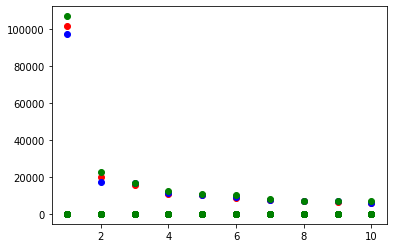

In [0]:
#  Plot the first NumberOfSigs singular values

#  Make this 768 or less:
NumberOfSigs = 10  
x = np.linspace(1,NumberOfSigs,NumberOfSigs)
plt.plot(x,Sigr[0:NumberOfSigs], 'o', color='red');
plt.plot(x,Sigb[0:NumberOfSigs], 'o', color='blue');
plt.plot(x,Sigg[0:NumberOfSigs], 'o', color='green');
